In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def simulate_processes(T, N, A0, B0, k, theta, mu, eta, sigma, rho):
    """
    Simulate the system of SDEs:
    dB(t) = mu*B(t)*dt + sigma*B(t)*dZ(t)
    dX(t) = k(theta - X(t))dt + eta*dW(t)
    where X(t) = ln(B(t)) - ln(A(t))
    
    Parameters:
    T : float - Time horizon
    N : int - Number of time steps
    A0, B0 : float - Initial values
    k : float - Mean reversion speed
    theta : float - Long-term mean spread
    mu : float - Drift of B(t)
    eta : float - Volatility of spread
    sigma : float - Volatility of B(t)
    rho : float - Correlation between Z(t) and W(t)
    """
    dt = T/N
    t = np.linspace(0, T, N+1)
    
    # Initialize arrays
    B = np.zeros(N+1)
    X = np.zeros(N+1)
    A = np.zeros(N+1)
    
    # Set initial values
    B[0] = B0
    X[0] = np.log(B0) - np.log(A0)
    A[0] = A0
    
    # Generate correlated Brownian motions
    dB1 = np.random.normal(0, np.sqrt(dt), N)
    dB2 = np.random.normal(0, np.sqrt(dt), N)
    
    dZ = dB1
    dW = rho * dB1 + np.sqrt(1 - rho**2) * dB2
    
    # Simulate processes
    for i in range(N):
        # Simulate B(t)
        B[i+1] = B[i] * (1 + mu*dt + sigma*dZ[i])
        
        # Simulate X(t)
        X[i+1] = X[i] + k*(theta - X[i])*dt + eta*dW[i]
        
        # Calculate A(t) from the relationship X(t) = ln(B(t)) - ln(A(t))
        A[i+1] = B[i+1] / np.exp(X[i+1])
    
    return t, B, A, X

def plot_simulation(t, B, A, X):
    """
    Plot the simulated processes
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot asset prices
    ax1.plot(t, B, label='B(t)', color='blue')
    ax1.plot(t, A, label='A(t)', color='red')
    ax1.set_title('Asset Prices')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)
    
    # Plot spread
    ax2.plot(t, X, label='X(t) = ln(B(t)) - ln(A(t))', color='green')
    ax2.set_title('Log Spread')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Spread')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Run simulation
def run_simulation():
    # Set parameters
    T = 10.0      # Time horizon
    N = 5000     # Number of time steps
    A0 = 100     # Initial value of A(t)
    B0 = 400     # Initial value of B(t)
    k = 2.0      # Mean reversion speed
    theta = 0.1  # Long-term mean spread
    mu = 0.1    # Drift of B(t)
    eta = 0.2    # Volatility of spread
    sigma = 1.  # Volatility of B(t)
    rho = 0.5    # Correlation coefficient
    
    # Simulate multiple paths
    num_sims = 3
    plt.figure(figsize=(12, 10))
    
    for i in range(num_sims):
        t, B, A, X = simulate_processes(T, N, A0, B0, k, theta, mu, eta, sigma, rho)
        plot_simulation(t, B, A, X)


<Figure size 1200x1000 with 0 Axes>

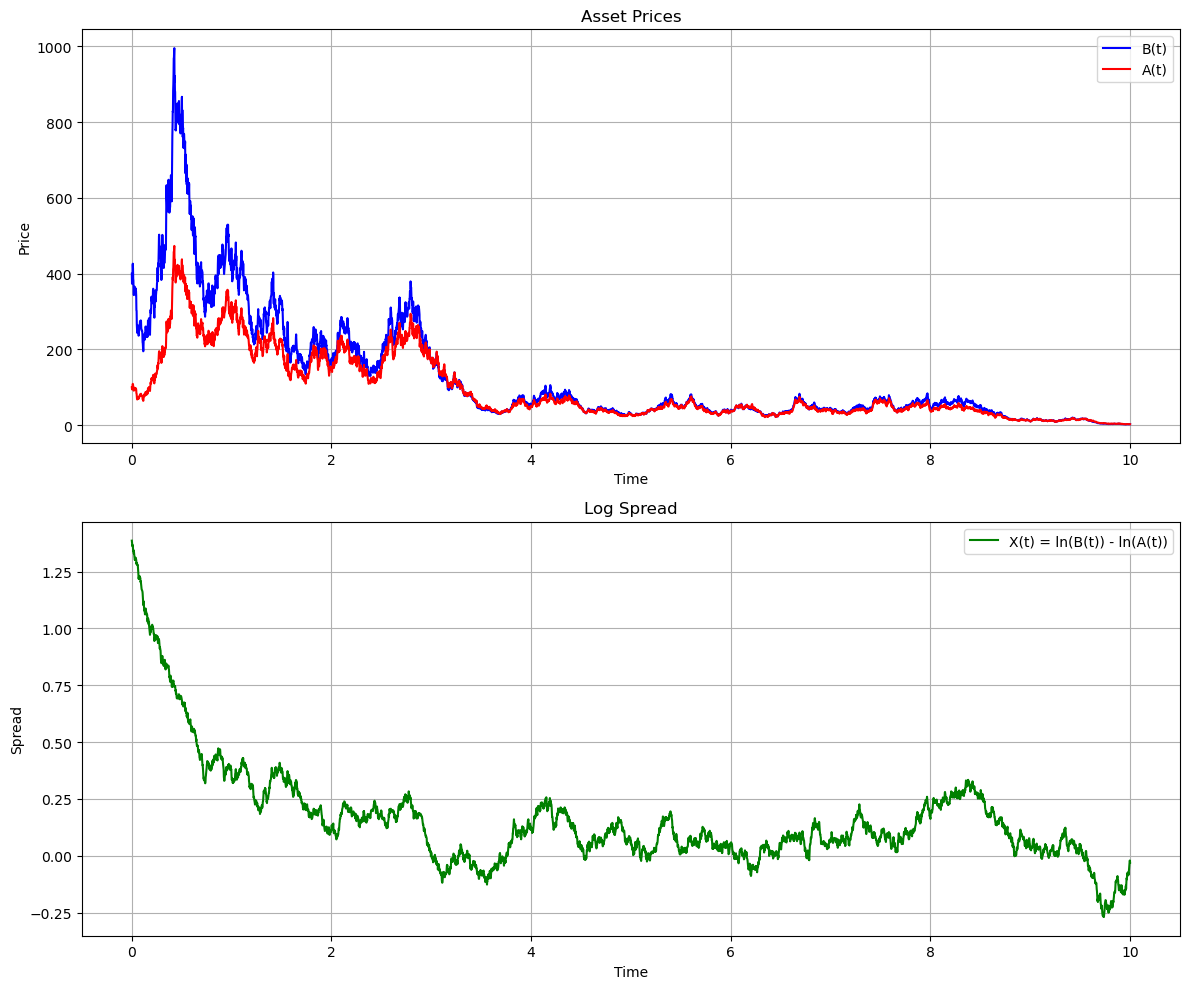

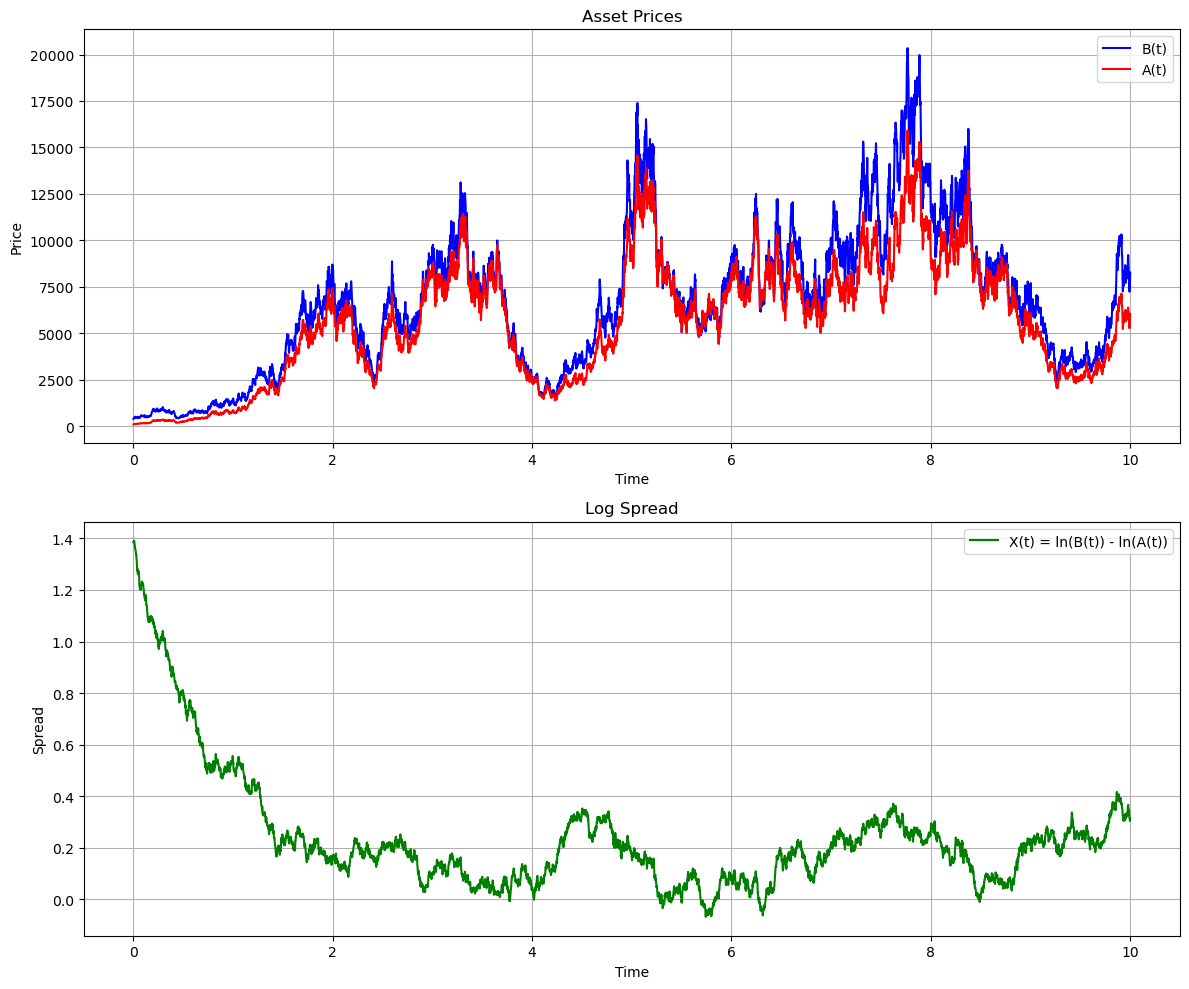

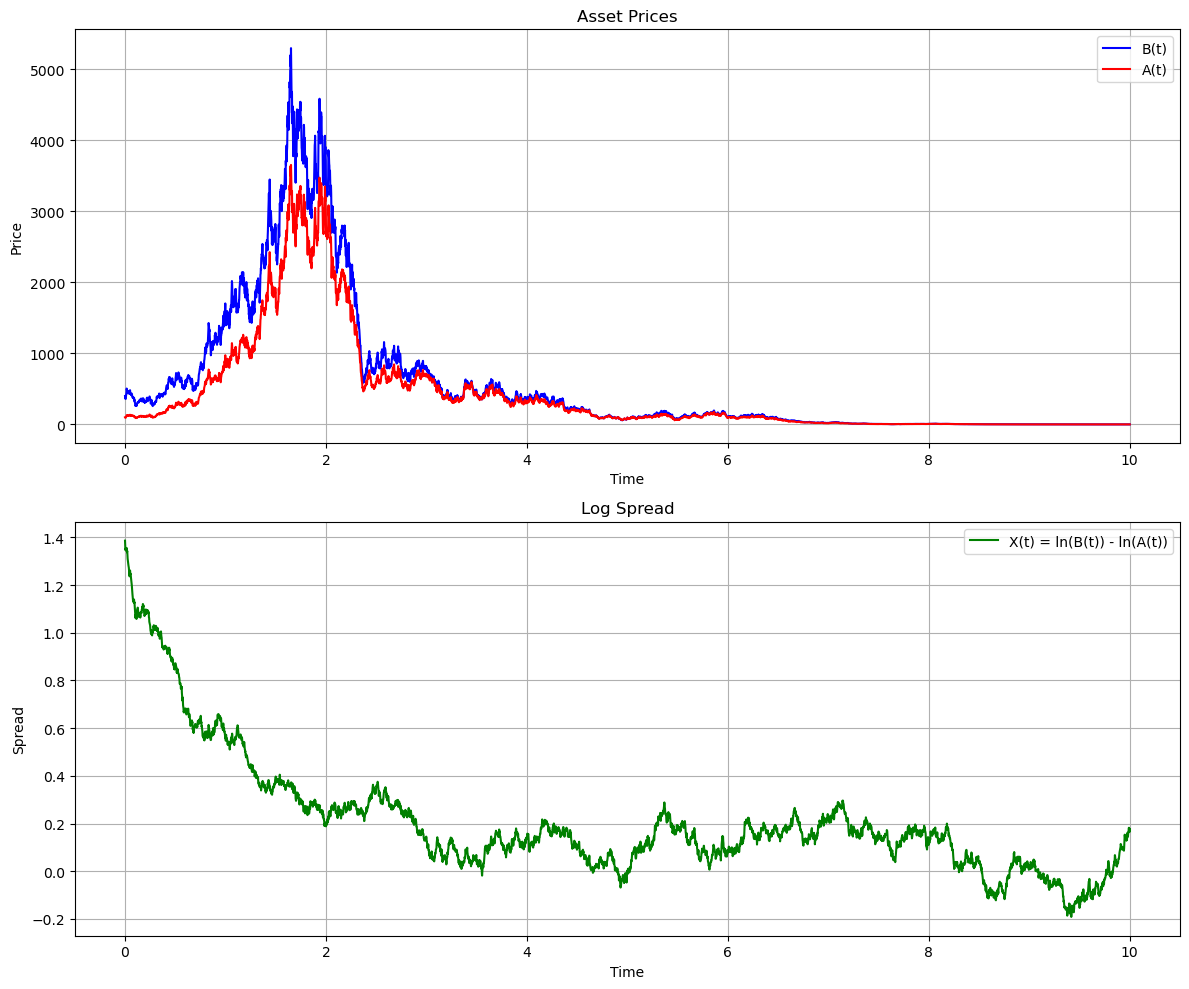

In [33]:
run_simulation()